In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data = datasets.load_iris()
iris = datasets.load_iris()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

from sklearn.model_selection import train_test_split
#x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Decision Trees

### How does it work

![alt text](resources/3_classification/DecisionTree.png)


* Powerful model for non-linear relationships

# Advantages
* Easy to understand and to interpret. Trees can be visualised
* White box model: Results can be explained by boolean logic. In a black box model (e.g., in an artificial neural network), results may be more difficult to interpret
* Requires little data preparation: No data normalisation required. However this module does not support missing values.
* Can handle both numerical and categorical data 
* Can handle multi-output problem
* Possible to validate a model using statistical tests. 
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

* Other techniques are usually specialised in analysing datasets that have only one type of variable.
* That makes it possible to account for the reliability of the model.
* Multi-output problem: y has multiple dimensions

# Disadvantages
* Decision-tree learners can create over-complex trees that do not generalise the data well (overfitting). Mechanisms such as setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree might be necessary to avoid it.
* Can be unstable because small variations in the data might result in a different tree being generated 
* Learning an optimal decision tree is known to be NP-complete. Therefore practical decision-tree learning algorithms are based on heuristic algorithms which cannot guarantee to return the globally optimal decision tree. 
* There are concepts that are hard to learn because decision trees can not express them easily, such as XOR problems
* Decision Trees can be biased if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree

* This problem is mitigated by using decision trees within an ensemble.
* This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
* Pruning currently not supported by scikit-learn

# Decision Trees with scikit-learn

### Splitting the dataset in test and training data

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

### Train the model

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Examples: Iris flower Dataset
* Part of scikit-learn
* 3 classes of flowers
* 4 dimensions: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)

<img src="./resources/3_classification/iris.jpg" width="400"/>

##### Bild:  CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=248095

# Plotting Decision Tree

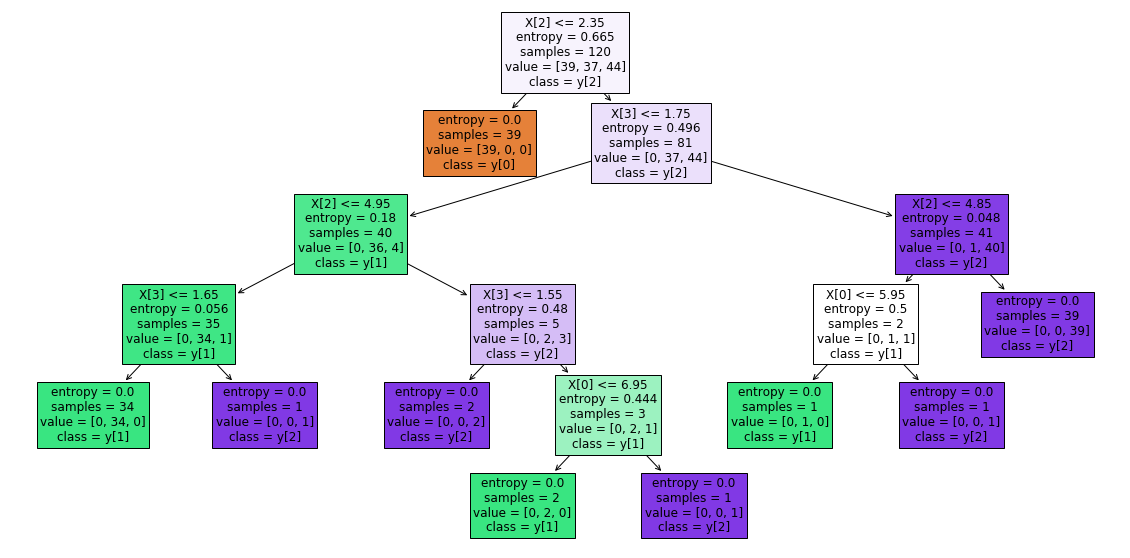

In [8]:
from sklearn import tree
from matplotlib.pyplot import figure
plt.figure(figsize=(20,10))
tree.plot_tree(dtc.fit(x_train, y_train), fontsize=12, class_names=True, filled=True);

# Validation

In [9]:
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test, y_test)*100))

Decision Tree Test Accuracy 100.00%


# Support Vector Classifier (SVC)

### How does it work?

* Find the maximum margin hyperplane or function to separate the dataset into two clusters (it's a so-called maximum-margin classificator)
* Multiple kernels to support non-linear problems
* Requires feature scaling

### Advantages

* Works well for high number of features (high dimensional spaces)
* Memory efficient because only a subset of data points is requried to compute the margin (the support vectors, hence the name)

### Disadvantes
* Bad runtime for large datasets, up to $O(n_{features} \times n_{samples}^3)$
* Binary classificator, no direct multiclass classification support (also applies to many other classifiers)
* Does not provide probability estimates

# SVC with scikit-learn

In [19]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svc = Pipeline([
('scaler', StandardScaler()),
('svm', SVC(kernel='rbf'))
])
svc.fit(x_train, y_train);

print("Test Accuracy of the SVC model: {:.2f}%".format(svc.score(x_test,y_test)*100))

Test Accuracy of the SVC model: 100.00%


# Plotting single support vector for Iris Flowers  (RBF Kernel)

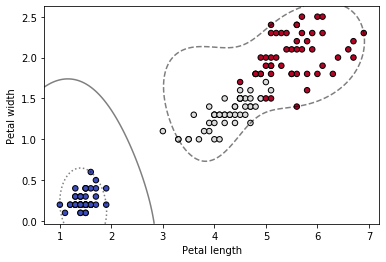

In [24]:
x = iris.data[:, (2,3)] ; # petal length and width
y = iris.target == 0 # 0=Setosa

svc = SVC(kernel="rbf"); svc.fit(x, y)

plt.scatter(x[:, 0], x[:, 1], c=iris.target, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
axes = plt.gca();xlim = axes.get_xlim();ylim = axes.get_ylim()
xx, yy = np.meshgrid(np.arange(xlim[0], xlim[1], .02), np.arange(ylim[0], ylim[1], .02))
xy = np.vstack([xx.ravel(), yy.ravel()]).T

decision_boundaries = svc.decision_function(xy).reshape(xx.shape)
axes.contour(xx, yy, decision_boundaries, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', ':'])
axes.set_xlabel('Petal length'); axes.set_ylabel('Petal width'); plt.show()

# Plot outcome of combined vectors for RBF Kernel

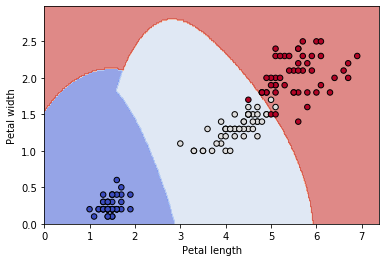

In [25]:
x = iris.data[:, (2,3)] # petal length and width
y = iris.target

clf = SVC(kernel='rbf'); clf.fit(x, y)

axes = plt.gca()
xx, yy = np.meshgrid(np.arange(0, x[:,0].max() + 0.5, .02), np.arange(0, x[:,1].max() + 0.5, .02))
axes.set_xlim(xx.min(), xx.max());axes.set_ylim(yy.min(), yy.max())

predicted_outcome = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
axes.contourf(xx, yy, predicted_outcome, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(x[:, 0], x[:, 1], c=iris.target, edgecolors='k', s=30, cmap=plt.cm.coolwarm)
axes.set_xlabel('Petal length');axes.set_ylabel('Petal width'); plt.show()

### Validation

In [15]:
print("Test Accuracy of the SVC model: {:.2f}%".format(svc.score(x_test,y_test)*
100))

Test Accuracy of the SVC model: 100.00%


# Principal Component Analyses

* Reduce dimensions, but keep as much variance (information) as possible
* Applications: visualization, speed up training


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

## Exercise

### Heart Disease Dataset

* Convert categorical variables into dummy/indicator variables, concerns cp, thal, slope (see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). Add the newly generated columns, drop the original columns.
* Use a decision tree classifier and a support vector classifier to create a model for predicting heart deseases
* Plot the decision tree
* Calculate error rate